# Detecting IBD2 (under construction, available from version xxx)

Authors: Yilei Huang (yilei_huang AT eva.mpg.de)

This notebook guides you to detect IBD2 regions using ancIBD. In human genetics, IBD2 mostly occurs between full-sibling pairs. It assumes some basic familiarity with the usage of ancIBD. If you haven't done so, we recommend you reading that first. The test data can be downloaded from [this link](https://share.eva.mpg.de/index.php/s/c9CDGPiasJ3AjBr). It contains imputed data of two pairs of full-siblings (GRG041, GRG081 and GRG007, GRG004), previously published in [Rivollat et al.](https://www.nature.com/articles/s41586-023-06350-8)

## Running ancIBD with its IBD2 mode

the bash command is exactly the same as for ancIBD's default setting (aka only detecting IBD1) except for the flag --IBD2. The output will be stored in a folder called "./test" (you can change this via --out). The input files other than the vcf file of imputed genotype data can be downloaded from the link provided in the IBD1 tutorial. Change the file path below according to your own set-up.

In [5]:
!for ch in {1..22}; do ancIBD-run --vcf /mnt/archgen/users/yilei/Data/sex_map/prepare_IBD2_demo/gurgy.FS.vcf.gz \
    --out ./test --ch $ch --IBD2 \
    --marker_path ./data/filters/snps_bcftools_ch$ch.csv \
    --map_path ./data/v51.1_1240k.snp \
    --af_path ./data/afs/v51.1_1240k_AF_ch$ch.tsv; done 

Print downsampling to 1240K...
Running bash command: 
bcftools view -Ov -o ./test/ch1.1240k.vcf -T ./data/filters/snps_bcftools_ch1.csv -M2 -v snps /mnt/archgen/users/yilei/Data/sex_map/prepare_IBD2_demo/gurgy.FS.vcf.gz
Finished BCF tools filtering to target markers.
Deleting previous HDF5 file at path_h5: ./test/ch1.h5...
Converting to HDF5...
Finished conversion to hdf5!
Merging in LD Map..
Lifting LD Map from eigenstrat to HDF5...
Loaded 89083 variants.
Loaded 4 individuals.
Loaded 93166 Chr.1 1240K SNPs.
Intersection 89082 out of 89083 HDF5 SNPs
Interpolating 1 variants.
Finished Chromosome 1.
Adding map to HDF5...
Intersection 88115 out of 89083 target HDF5 SNPs. 968 SNPs set to AF=0.5
Transformation complete! Find new hdf5 file at: ./test/ch1.h5

Attention: Some data in GP field is missing. Ideally, all GP entries are set.
Print downsampling to 1240K...
Running bash command: 
bcftools view -Ov -o ./test/ch2.1240k.vcf -T ./data/filters/snps_bcftools_ch2.csv -M2 -v snps /mnt/archge

Now let's compute pairwise compute summary statistics. The command is the same as for the IBD1 case, except that you need the flag --IBD2 to tell the program to also summarize IBD2 sharing. The output file from this command will be stored in the current working directory unless specified otherwise via --out.

In [6]:
!ancIBD-summary --tsv ./test/ch --IBD2

Chromosome 1; Loaded 17 IBD
Chromosome 2; Loaded 23 IBD
Chromosome 3; Loaded 9 IBD
Chromosome 4; Loaded 11 IBD
Chromosome 5; Loaded 22 IBD
Chromosome 6; Loaded 11 IBD
Chromosome 7; Loaded 16 IBD
Chromosome 8; Loaded 13 IBD
Chromosome 9; Loaded 6 IBD
Chromosome 10; Loaded 10 IBD
Chromosome 11; Loaded 15 IBD
Chromosome 12; Loaded 12 IBD
Chromosome 13; Loaded 12 IBD
Chromosome 14; Loaded 5 IBD
Chromosome 15; Loaded 8 IBD
Chromosome 16; Loaded 12 IBD
Chromosome 17; Loaded 10 IBD
Chromosome 18; Loaded 7 IBD
Chromosome 19; Loaded 8 IBD
Chromosome 20; Loaded 7 IBD
Chromosome 21; Loaded 3 IBD
Chromosome 22; Loaded 6 IBD
Saved 243 IBD to /mnt/archgen/users/yilei/tools/ancIBD/docs/ch_all.tsv.
/home/yilei_huang/.local/lib/python3.8/site-packages/ancIBD-0.5b0-py3.8-linux-x86_64.egg/ancIBD/IO/ind_ibd.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

## Visualize IBD2 region with imputed data

In some cases it might be beneficial to visually examine the detected IBD2 region to make sure it indeed looks like real IBD2. We can use the function `ancIBD.run.run_plot_pair_IBD2` to do just that. The function will call IBD2 on a given chromosome and visualize the called IBD1 as blue bar on top of the figure and called IBD2 as dark brown bar (which is then plotted on top of the IBD1 bar). There are two rows of gray dots below the IBD bar. The higher row depicts sites where the two individuals have different imputed genotypes (thus cannot be IBD2). The lower row depicts sites where the two individuals have oposing homozygotes (thus cannot be IBD1).

In [3]:
from ancIBD.run import run_plot_pair_IBD2

Let's first visualize a full-sib pair, using chr1 as an example.

Attention: Some data in GP field is missing. Ideally, all GP entries are set.
Filtering to 0.99 GP variants: 0.931x
Filtering to 0.99 GP variants: 0.869x
Filtering to common GP variants: 0.836x
Filtering to 0.99 GP variants: 0.931x
Filtering to 0.99 GP variants: 0.869x
Filtering to common GP variants: 0.836x


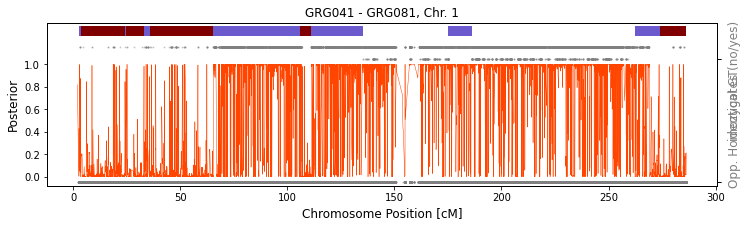

In [2]:
run_plot_pair_IBD2(path_h5="./test/ch", 
                  iids = ["GRG041", "GRG081"], ch=1, 
                  plot=True)

Now let's visualzie a non full-sib pair. We can clearly see the absence of IBD2 by looking at the higher row of gray dots, which is densely distributed across the entire chromosome.

Attention: Some data in GP field is missing. Ideally, all GP entries are set.
Filtering to 0.99 GP variants: 0.931x
Filtering to 0.99 GP variants: 0.705x
Filtering to common GP variants: 0.681x
Filtering to 0.99 GP variants: 0.931x
Filtering to 0.99 GP variants: 0.705x
Filtering to common GP variants: 0.681x


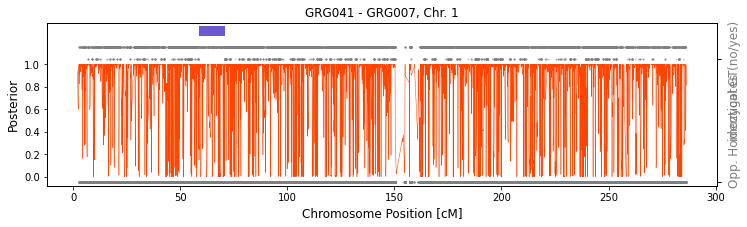

In [4]:
run_plot_pair_IBD2(path_h5="./test/ch", 
                  iids = ["GRG041", "GRG007"], ch=1, 
                  plot=True)